In [188]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn; seaborn.set()
import matplotlib.dates as dates
pd.options.display.float_format = "{:,.2f}".format


In [3]:
df = pd.read_excel('kamereo_test_data analyst.xlsx', skiprows=4)
drop_col = df.iloc[:,5:]
df = df.drop(drop_col, axis=1)
df

,Date,Category A,Customer,Qty Sold,Revenue
0,20171001,A,2,18,4058699
1,20171001,A,1,29,13178000
2,20171002,A,1,55,23493200
3,20171002,A,2,30,6540835
4,20171003,A,2,25,5888624
...,...,...,...,...,...
725,20180928,A,1,106,88288800
726,20180929,A,2,183,33435608
727,20180929,A,1,79,70059570
728,20180930,A,1,76,56706500


In [99]:
df.groupby(['Date','Category A']).sum().reset_index().describe()

,Customer,Qty Sold,Revenue
count,365.00,365.00,365.00
mean,3.00,158.62,"61,458,297.24"
std,0.00,82.07,"48,940,126.24"
min,3.00,40.00,"12,199,275.00"
25%,3.00,96.00,"35,165,725.00"
50%,3.00,145.00,"54,781,690.00"
75%,3.00,199.00,"73,695,875.00"
max,3.00,509.00,"737,568,813.00"


In [73]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

Cus1 = df[df['Customer'] == 1]
Cus2 = df[df['Customer'] == 2]

df2017 = df[df['Date'].dt.year == 2017]
df2018 = df[df['Date'].dt.year == 2018]

Cus1_2017 = Cus1[Cus1['Date'].dt.year == 2017]
Cus1_2018 = Cus1[Cus1['Date'].dt.year == 2018]

Cus2_2017 = Cus2[Cus2['Date'].dt.year == 2017]
Cus2_2018 = Cus2[Cus2['Date'].dt.year == 2018]

In [38]:
print("All Qty Sold Sum: {}".format(df['Qty Sold'].sum()))

print("All Qty Sold IQR: {}".format(np.subtract(*np.percentile(df['Qty Sold'], [75, 25]))))

print("All Revenue Sum: {}".format(df['Revenue'].sum()))

print("All Revenue IQR: {}".format(np.subtract(*np.percentile(df['Revenue'], [75, 25]))))

print(df[['Qty Sold', 'Revenue']].describe())

All Qty Sold Sum: 57897
All Qty Sold IQR: 51.0
All Revenue Sum: 22432278491
All Revenue IQR: 25592937.5
       Customer  Qty Sold        Revenue
count    730.00    730.00         730.00
mean       1.50     79.31  30,729,148.62
std        0.50     45.60  35,065,763.02
min        1.00     18.00   3,995,750.00
25%        1.00     47.00  13,479,500.00
50%        1.50     70.00  23,075,200.00
75%        2.00     98.00  39,072,437.50
max        2.00    396.00 710,999,930.00


In [39]:
print("All Qty Sold Sum df2017: {}".format(df2017['Qty Sold'].sum()))

print("All Qty Sold IQR df2017: {}".format(np.subtract(*np.percentile(df2017['Qty Sold'], [75, 25]))))

print("All Revenue Sum df2017: {}".format(df2017['Revenue'].sum()))

print("All Revenue IQR df2017: {}".format(np.subtract(*np.percentile(df2017['Revenue'], [75, 25]))))

print(df2017[['Qty Sold', 'Revenue']].describe())

All Qty Sold Sum df2017: 9162
All Qty Sold IQR df2017: 18.5
All Revenue Sum df2017: 3325168698
All Revenue IQR df2017: 13524594.5
       Customer  Qty Sold        Revenue
count    184.00    184.00         184.00
mean       1.50     49.79  18,071,569.01
std        0.50     33.99  18,506,678.90
min        1.00     18.00   4,058,699.00
25%        1.00     32.00   7,546,780.50
50%        1.50     40.00  12,831,943.00
75%        2.00     50.50  21,071,375.00
max        2.00    238.00 136,283,200.00


In [42]:
print("All Qty Sold Sum df2018: {}".format(df2018['Qty Sold'].sum()))

print("All Qty Sold IQR df2018: {}".format(np.subtract(*np.percentile(df2018['Qty Sold'], [75, 25]))))

print("All Revenue Sum df2018: {}".format(df2018['Revenue'].sum()))

print("All Revenue IQR df2018: {}".format(np.subtract(*np.percentile(df2018['Revenue'], [75, 25]))))

print(df2018[['Qty Sold', 'Revenue']].describe())

All Qty Sold Sum df2018: 48735
All Qty Sold IQR df2018: 45.75
All Revenue Sum df2018: 19107109793
All Revenue IQR df2018: 26700585.25
       Qty Sold        Revenue
count    546.00         546.00
mean      89.26  34,994,706.58
std       44.73  38,176,152.84
min       20.00   3,995,750.00
25%       60.00  16,532,349.75
50%       79.00  29,570,260.00
75%      105.75  43,232,935.00
max      396.00 710,999,930.00


In [44]:
print("Cus1 Qty Sold Sum: {}".format(Cus1['Qty Sold'].sum()))

print("Cus1 Qty Sold IQR: {}".format(np.subtract(*np.percentile(Cus1['Qty Sold'], [75, 25]))))

print("Cus1 Revenue Sum: {}".format(Cus1['Revenue'].sum()))

print("Cus1 Revenue IQR: {}".format(np.subtract(*np.percentile(Cus1['Revenue'], [75, 25]))))

print(Cus1[['Qty Sold', 'Revenue']].describe())

Cus1 Qty Sold Sum: 27620
Cus1 Qty Sold IQR: 46.0
Cus1 Revenue Sum: 16401460707
Cus1 Revenue IQR: 28293936.0
       Qty Sold        Revenue
count    365.00         365.00
mean      75.67  44,935,508.79
std       40.43  44,422,702.83
min       20.00   7,103,400.00
25%       47.00  24,805,600.00
50%       69.00  38,806,660.00
75%       93.00  53,099,536.00
max      396.00 710,999,930.00


In [47]:
print("Cus1 Qty Sold Sum Cus1_2017: {}".format(Cus1_2017['Qty Sold'].sum()))

print("Cus1 Qty Sold IQR Cus1_2017: {}".format(np.subtract(*np.percentile(Cus1_2017['Qty Sold'], [75, 25]))))

print("Cus1 Revenue Sum Cus1_2017: {}".format(Cus1_2017['Revenue'].sum()))

print("Cus1 Revenue IQR Cus1_2017: {}".format(np.subtract(*np.percentile(Cus1_2017['Revenue'], [75, 25]))))

print(Cus1_2017[['Qty Sold', 'Revenue']].describe())

Cus1 Qty Sold Sum Cus1_2017: 5028
Cus1 Qty Sold IQR Cus1_2017: 19.25
Cus1 Revenue Sum Cus1_2017: 2507286007
Cus1 Revenue IQR Cus1_2017: 10609840.75
       Qty Sold        Revenue
count     92.00          92.00
mean      54.65  27,253,108.77
std       38.41  22,316,669.54
min       21.00   7,103,400.00
25%       35.00  15,841,665.00
50%       43.00  20,040,550.00
75%       54.25  26,451,505.75
max      238.00 136,283,200.00


In [48]:
print("Cus1 Qty Sold Sum Cus1_2018: {}".format(Cus1_2018['Qty Sold'].sum()))

print("Cus1 Qty Sold IQR Cus1_2018: {}".format(np.subtract(*np.percentile(Cus1_2018['Qty Sold'], [75, 25]))))

print("Cus1 Revenue Sum Cus1_2018: {}".format(Cus1_2018['Revenue'].sum()))

print("Cus1 Revenue IQR Cus1_2018: {}".format(np.subtract(*np.percentile(Cus1_2018['Revenue'], [75, 25]))))

print(Cus1_2018[['Qty Sold', 'Revenue']].describe())

Cus1 Qty Sold Sum Cus1_2018: 22592
Cus1 Qty Sold IQR Cus1_2018: 36.0
Cus1 Revenue Sum Cus1_2018: 13894174700
Cus1 Revenue IQR Cus1_2018: 20260500.0
       Qty Sold        Revenue
count    273.00         273.00
mean      82.75  50,894,412.82
std       38.65  48,299,341.04
min       20.00  10,488,500.00
25%       61.00  34,962,800.00
50%       76.00  43,238,000.00
75%       97.00  55,223,300.00
max      396.00 710,999,930.00


In [43]:
print("Cus2 Qty Sold Sum: {}".format(Cus2['Qty Sold'].sum()))

print("Cus2 Qty Sold IQR: {}".format(np.subtract(*np.percentile(Cus2['Qty Sold'], [75, 25]))))

print("Cus2 Revenue Sum: {}".format(Cus2['Revenue'].sum()))

print("Cus2 Revenue IQR: {}".format(np.subtract(*np.percentile(Cus2['Revenue'], [75, 25]))))

print(Cus2[['Qty Sold', 'Revenue']].describe())

Cus2 Qty Sold Sum: 30277
Cus2 Qty Sold IQR: 59.0
Cus2 Revenue Sum: 6030817784
Cus2 Revenue IQR: 12012365.0
       Qty Sold       Revenue
count    365.00        365.00
mean      82.95 16,522,788.45
std       50.04  9,190,579.21
min       18.00  3,995,750.00
25%       47.00  9,419,720.00
50%       73.00 14,496,390.00
75%      106.00 21,432,085.00
max      359.00 42,712,802.00


In [49]:
print("Cus2 Qty Sold Sum Cus2_2017: {}".format(Cus2_2017['Qty Sold'].sum()))

print("Cus2 Qty Sold IQR Cus2_2017: {}".format(np.subtract(*np.percentile(Cus2_2017['Qty Sold'], [75, 25]))))

print("Cus2 Revenue Sum Cus2_2017: {}".format(Cus2_2017['Revenue'].sum()))

print("Cus2 Revenue IQR Cus2_2017: {}".format(np.subtract(*np.percentile(Cus2_2017['Revenue'], [75, 25]))))

print(Cus2_2017[['Qty Sold', 'Revenue']].describe())

Cus2 Qty Sold Sum Cus2_2017: 4134
Cus2 Qty Sold IQR Cus2_2017: 19.25
Cus2 Revenue Sum Cus2_2017: 817882691
Cus2 Revenue IQR Cus2_2017: 3882704.5
       Qty Sold       Revenue
count     92.00         92.00
mean      44.93  8,890,029.25
std       28.28  4,502,242.43
min       18.00  4,058,699.00
25%       29.75  6,028,807.00
50%       37.00  7,729,392.50
75%       49.00  9,911,511.50
max      169.00 31,705,343.00


In [50]:
print("Cus2 Qty Sold Sum Cus2_2018: {}".format(Cus2_2018['Qty Sold'].sum()))

print("Cus2 Qty Sold IQR Cus2_2018: {}".format(np.subtract(*np.percentile(Cus2_2018['Qty Sold'], [75, 25]))))

print("Cus2 Revenue Sum Cus2_2018: {}".format(Cus2_2018['Revenue'].sum()))

print("Cus2 Revenue IQR Cus2_2018: {}".format(np.subtract(*np.percentile(Cus2_2018['Revenue'], [75, 25]))))

print(Cus2_2018[['Qty Sold', 'Revenue']].describe())

Cus2 Qty Sold Sum Cus2_2018: 26143
Cus2 Qty Sold IQR Cus2_2018: 61.0
Cus2 Revenue Sum Cus2_2018: 5212935093
Cus2 Revenue IQR Cus2_2018: 12109710.0
       Qty Sold       Revenue
count    273.00        273.00
mean      95.76 19,095,000.34
std       49.29  8,939,181.07
min       20.00  3,995,750.00
25%       60.00 12,399,720.00
50%       81.00 16,833,109.00
75%      121.00 24,509,430.00
max      359.00 42,712,802.00


In [207]:
Cus1[Cus1['Qty Sold'] >= 200].reset_index().style.format({"Revenue": "{:,.0f}"})

,index,Date,Category A,Customer,Qty Sold,Revenue
0,109,2017-11-24 00:00:00,A,1,238,"136,283,200"
1,145,2017-12-12 00:00:00,A,1,214,"114,516,910"
2,359,2018-03-29 00:00:00,A,1,208,"108,569,100"
3,452,2018-05-15 00:00:00,A,1,215,"271,863,820"
4,615,2018-08-04 00:00:00,A,1,396,"710,999,930"
5,623,2018-08-08 00:00:00,A,1,213,"173,033,851"
6,661,2018-08-27 00:00:00,A,1,202,"65,345,680"


In [226]:
Cus1[Cus1['Qty Sold'] >= 200].reset_index().style.format({"Revenue": "{:,.0f}"})

,index,Date,Category A,Customer,Qty Sold,Revenue
0,109,2017-11-24 00:00:00,A,1,238,"136,283,200"
1,145,2017-12-12 00:00:00,A,1,214,"114,516,910"
2,359,2018-03-29 00:00:00,A,1,208,"108,569,100"
3,452,2018-05-15 00:00:00,A,1,215,"271,863,820"
4,615,2018-08-04 00:00:00,A,1,396,"710,999,930"
5,623,2018-08-08 00:00:00,A,1,213,"173,033,851"
6,661,2018-08-27 00:00:00,A,1,202,"65,345,680"


In [62]:
Cus2[Cus2['Qty Sold'] >= 200].reset_index(drop=True).style.format({"Revenue": "{:,.0f}"})

,Date,Category A,Customer,Qty Sold,Revenue,Quarter
0,2018-09-06 00:00:00,A,2,231,"37,519,225",2018Q3
1,2018-09-07 00:00:00,A,2,359,"38,617,850",2018Q3
2,2018-09-08 00:00:00,A,2,204,"36,680,747",2018Q3
3,2018-09-09 00:00:00,A,2,221,"34,343,709",2018Q3
4,2018-09-18 00:00:00,A,2,202,"37,065,604",2018Q3
5,2018-09-19 00:00:00,A,2,207,"38,517,347",2018Q3
6,2018-09-20 00:00:00,A,2,200,"39,383,915",2018Q3
7,2018-09-24 00:00:00,A,2,230,"42,266,138",2018Q3
8,2018-09-25 00:00:00,A,2,216,"42,712,802",2018Q3
9,2018-09-26 00:00:00,A,2,203,"36,345,737",2018Q3


In [74]:
All = df.groupby(['Date', 'Category A']).sum().reset_index()[['Date', 'Revenue']]
All.set_index('Date', inplace=True)
All = All['Revenue']
Cus1.set_index('Date', inplace=True)
Cus2.set_index('Date', inplace=True)
c1 = Cus1['Revenue']
c2 = Cus2['Revenue']

<AxesSubplot:xlabel='Date'>

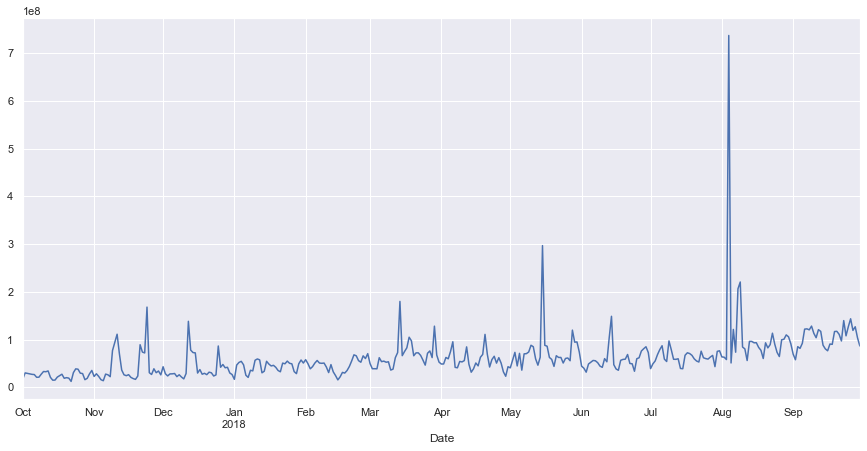

In [421]:
#d = Cus1.drop(Cus1[Cus1['Qty Sold'] == 396].index, axis=0)


plt.figure(figsize=(15,7))
#plt.ticklabel_format(style = 'plain')
All.plot()

In [189]:
y = All.resample('M').mean()
x = y.index.to_pydatetime()
x = dates.date2num(x)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

In [262]:
c1.resample('M').mean()


Date
2017-10-31   18,784,550.94
2017-11-30   32,915,859.07
2017-12-31   30,241,585.68
2018-01-31   34,416,934.19
2018-02-28   34,590,018.93
2018-03-31   53,822,593.42
2018-04-30   42,254,161.77
2018-05-31   56,728,073.77
2018-06-30   40,028,663.53
2018-07-31   40,687,483.32
2018-08-31   83,328,968.35
2018-09-30   70,622,125.53
Freq: M, Name: Revenue, dtype: float64

In [263]:
c2.resample('M').mean()

Date
2017-10-31    6,450,452.39
2017-11-30   10,777,735.40
2017-12-31    9,502,793.71
2018-01-31    8,914,063.29
2018-02-28   11,622,954.79
2018-03-31   13,716,886.81
2018-04-30   13,464,004.27
2018-05-31   17,946,953.61
2018-06-30   18,719,603.83
2018-07-31   22,074,376.68
2018-08-31   30,455,574.68
2018-09-30   34,521,353.63
Freq: M, Name: Revenue, dtype: float64

In [218]:
All.resample('M').mean()

Date
2017-10-31    25,235,003.32
2017-11-30    43,693,594.47
2017-12-31    39,744,379.39
2018-01-31    43,330,997.48
2018-02-28    46,212,973.71
2018-03-31    67,539,480.23
2018-04-30    55,718,166.03
2018-05-31    74,675,027.39
2018-06-30    58,748,267.37
2018-07-31    62,761,860.00
2018-08-31   113,784,543.03
2018-09-30   105,143,479.17
Freq: M, Name: Revenue, dtype: float64

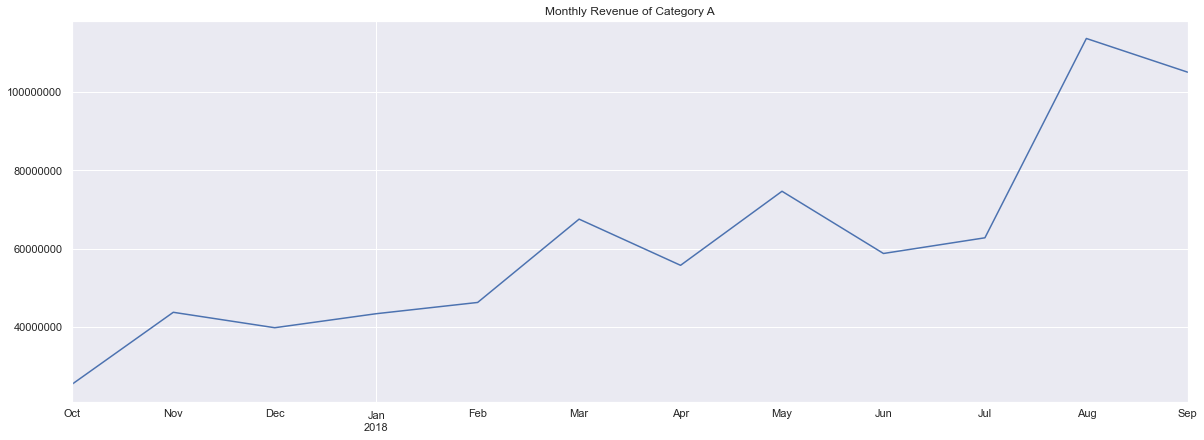

In [259]:
from datetime import datetime
plt.figure(figsize=(20,7))
plt.ticklabel_format(style = 'plain')
#plt.plot(x, p(x))
All.resample('M').mean().plot()
plt.xlabel(None)
plt.title("Monthly Revenue of Category A")
#plt.xticks(pd.to_datetime(m.index, errors='coerce').strftime('%m-%Y'))
#plt.legend(['Trend', 'Revenue'],
           #loc='upper left')
plt.show()

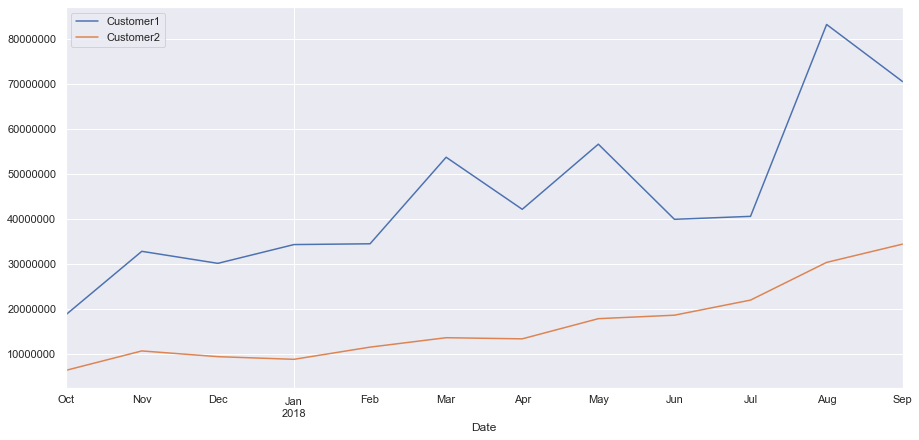

In [56]:
plt.figure(figsize=(15,7))
plt.ticklabel_format(style = 'plain')
c1.resample('M').mean().plot()
c2.resample('M').mean().plot()
#goog.asfreq('BA').plot(style='--');
plt.legend(['Customer1', 'Customer2'],
           loc='upper left')

In [376]:
CateA = df.groupby(['Date', 'Category A']).sum().reset_index()[['Date','Qty Sold', 'Revenue']]
CateA.describe()

,Qty Sold,Revenue
count,365.00,365.00
mean,158.62,"61,458,297.24"
std,82.07,"48,940,126.24"
min,40.00,"12,199,275.00"
25%,96.00,"35,165,725.00"
50%,145.00,"54,781,690.00"
75%,199.00,"73,695,875.00"
max,509.00,"737,568,813.00"


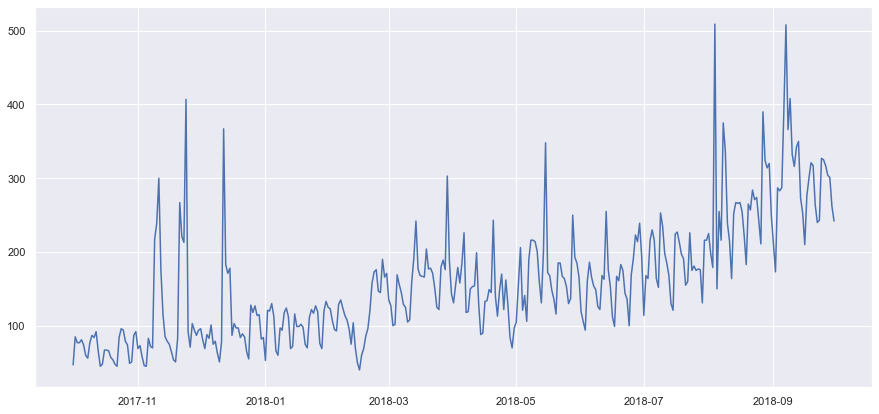

In [290]:
plt.figure(figsize=(15,7))
plt.plot(CateA['Date'], CateA['Qty Sold'])

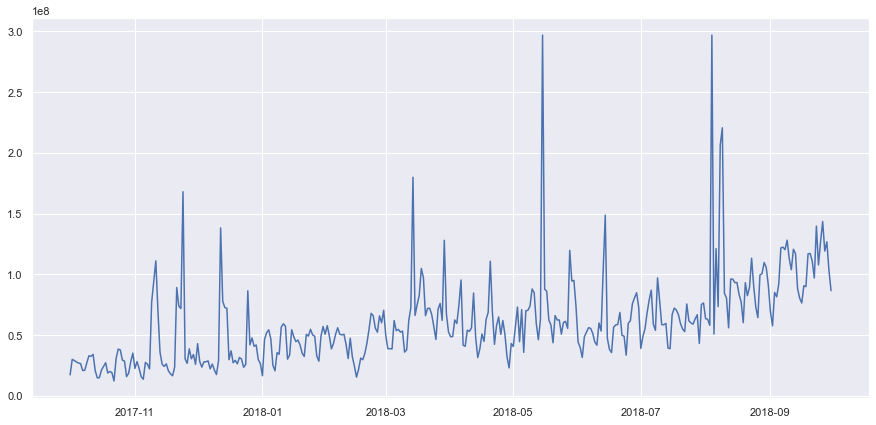

In [334]:
plt.figure(figsize=(15,7))
plt.plot(CateA['Date'], CateA['Revenue'])

In [292]:
CateA.sort_values(by='Revenue').tail()

,Date,Qty Sold,Revenue
164,2018-03-14,242,179914840
311,2018-08-08,375,206303520
312,2018-08-09,337,220640026
226,2018-05-15,348,296962733
307,2018-08-04,509,737568813


In [377]:
#CateA.loc[307]['Revenue'] = 296962733
CateA.loc[CateA[CateA['Qty Sold'] == 509].index, 'Revenue']= 296962733

In [378]:
CateA.set_index('Date', inplace=True)

In [379]:
CateA

,Qty Sold,Revenue
Date,,
2017-10-01,47,17236699
2017-10-02,85,30034035
2017-10-03,77,29067824
2017-10-04,77,27882519
2017-10-05,81,26975920
...,...,...
2018-09-26,317,143517747
2018-09-27,304,119158716
2018-09-28,301,126789512


<AxesSubplot:xlabel='Date'>

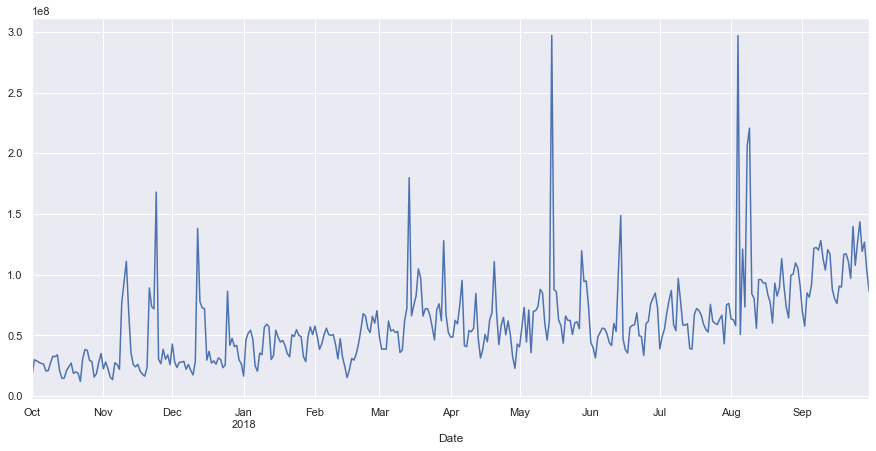

In [382]:
plt.figure(figsize=(15,7))
CateA['Revenue'].plot()

In [412]:
reliance = CateA['Revenue'].to_frame()
reliance['EWMA30'] = reliance['Revenue'].ewm(span=30).mean()
reliance

,Revenue,EWMA30
Date,,
2017-10-01,17236699,"17,236,699.00"
2017-10-02,30034035,"23,848,655.93"
2017-10-03,29067824,"25,705,605.40"
2017-10-04,27882519,"26,305,424.43"
2017-10-05,26975920,"26,457,978.40"
...,...,...
2018-09-26,143517747,"106,377,705.54"
2018-09-27,119158716,"107,202,286.86"
2018-09-28,126789512,"108,465,978.81"


<AxesSubplot:xlabel='Date'>

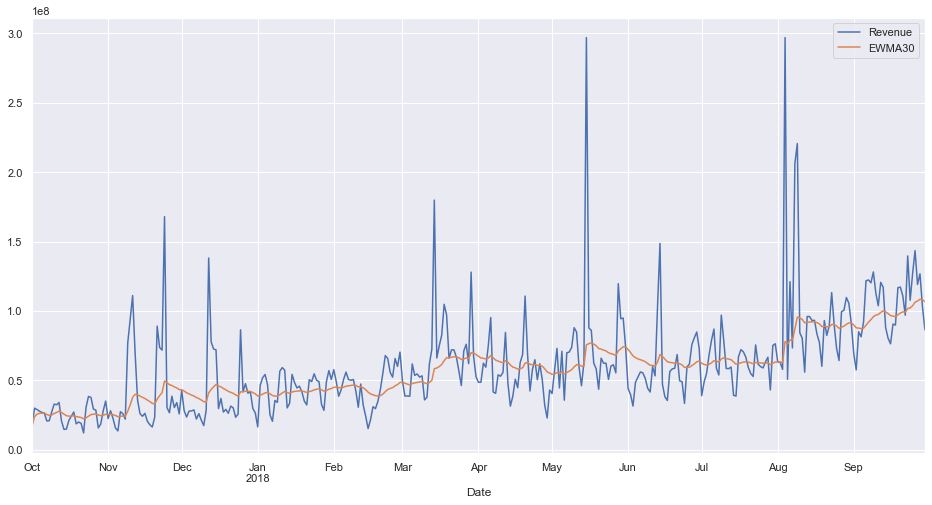

In [413]:
reliance[['Revenue', 'EWMA30']].plot(label='RELIANCE',
                                   figsize=(16, 8))

c:\Users\ASUS\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='Date'>

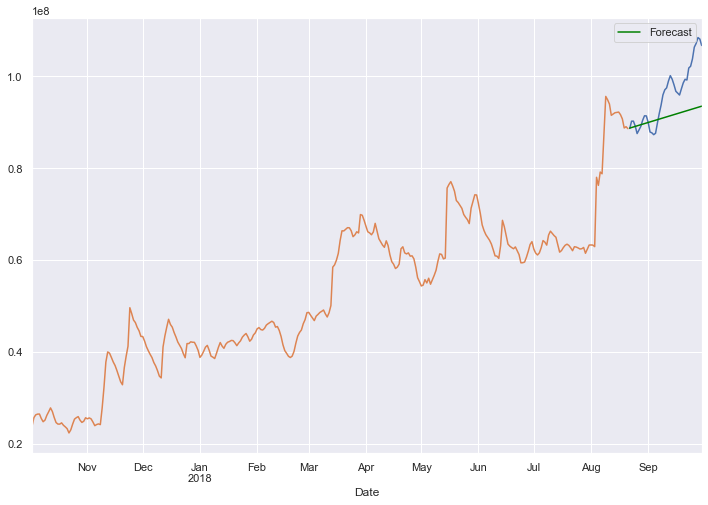

In [417]:
from statsmodels.tsa.api import Holt
Train = reliance[1:325]
Test = reliance[325:]
fit2 = Holt(Train['EWMA30'], initialization_method="estimated").fit()
fcast2 = fit2.forecast(40).rename("Forecast")
ax = Test['EWMA30'].plot(figsize=(12, 8))
Train['EWMA30'].plot(ax=ax, legend=False)

fcast2.plot(ax=ax, color="green", legend=True)

c:\Users\ASUS\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='Date'>

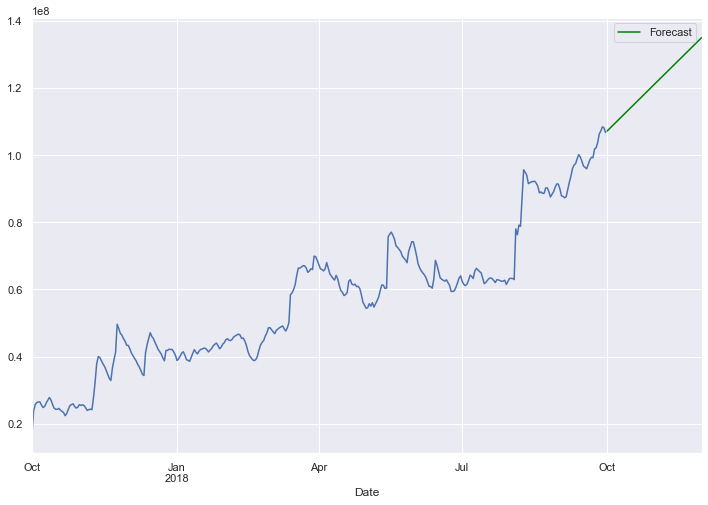

In [419]:
#Forecast the daily performance of Category A in Oct and November
fit2 = Holt(reliance['EWMA30'], initialization_method="estimated").fit()
fcast2 = fit2.forecast(61).rename("Forecast")
ax = reliance['EWMA30'].plot(figsize=(12, 8))
#Train['EWMA30'].plot(ax=ax, legend=False)

fcast2.plot(ax=ax, color="green", legend=True)